In [ ]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
cus_df = pd.read_csv("Customer_Segmentation/dataset/Customer Segmentation.csv")
cus_df.head(3)

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category
0,462809,Male,No,22,No,Healthcare,1.00,Low,4.00,Category 4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.00,Category 4
2,466315,Female,Yes,67,Yes,Engineer,1.00,Low,1.00,Category 6


In [ ]:
cus_df

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category
0,462809,Male,No,22,No,Healthcare,1.00,Low,4.00,Category 4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.00,Category 4
2,466315,Female,Yes,67,Yes,Engineer,1.00,Low,1.00,Category 6
3,461735,Male,Yes,67,Yes,Lawyer,0.00,High,2.00,Category 6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.00,Category 6
...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.00,Low,4.00,Category 6
10691,467958,Female,No,35,Yes,Doctor,1.00,Low,1.00,Category 6
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.00,Category 6
10693,467961,Male,Yes,47,Yes,Executive,1.00,High,5.00,Category 4


In [ ]:
cus_df.columns

Index(['CustomerID', 'Gender', 'Married', 'Age', 'Graduated', 'Profession',
       'WorkExperience', 'SpendingScore', 'FamilySize', 'Category'],
      dtype='object')

In [ ]:
cus_df.shape

(10695, 10)

In [ ]:
cus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      10695 non-null  int64  
 1   Gender          10695 non-null  object 
 2   Married         10505 non-null  object 
 3   Age             10695 non-null  int64  
 4   Graduated       10593 non-null  object 
 5   Profession      10533 non-null  object 
 6   WorkExperience  9597 non-null   float64
 7   SpendingScore   10695 non-null  object 
 8   FamilySize      10247 non-null  float64
 9   Category        10587 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 835.7+ KB


In [ ]:
category_cus_df = cus_df.select_dtypes(include=['object']).columns
category_cus_df = category_cus_df.drop("Category")
category_cus_df

Index(['Gender', 'Married', 'Graduated', 'Profession', 'SpendingScore'], dtype='object')

In [ ]:
numberical_cus_df = cus_df.select_dtypes(include=['number']).columns
numberical_cus_df = numberical_cus_df.drop('CustomerID')
numberical_cus_df

Index(['Age', 'WorkExperience', 'FamilySize'], dtype='object')

In [ ]:
for col in numberical_cus_df:
  print("="*60)
  print(f"\n{col}:")
  numberical_df = pd.DataFrame({
      'Index': cus_df[col].value_counts().index,
      'Value': cus_df[col].value_counts().values
  })
  print(numberical_df)


Age:
    Index  Value
0      35    321
1      42    320
2      37    304
3      43    301
4      40    300
..    ...    ...
62     75     37
63     76     36
64     78     36
65     80     33
66     85     32

[67 rows x 2 columns]

WorkExperience:
    Index  Value
0    1.00   3127
1    0.00   3087
2    9.00    613
3    8.00    612
4    2.00    373
5    4.00    346
6    3.00    337
7    5.00    270
8    6.00    265
9    7.00    256
10  14.00     66
11  10.00     64
12  11.00     64
13  12.00     60
14  13.00     57

FamilySize:
   Index  Value
0   2.00   3158
1   1.00   1965
2   3.00   1952
3   4.00   1823
4   5.00    812
5   6.00    290
6   7.00    122
7   8.00     65
8   9.00     60


In [ ]:
for col in category_cus_df:
  print("="*60)
  print(f"\n{col}:")
  category_df = pd.DataFrame({
      'Index': cus_df[col].value_counts().index,
      'Value': cus_df[col].value_counts()
  })
  print(category_df)


Gender:
         Index  Value
Gender               
Male      Male   5841
Female  Female   4854

Married:
        Index  Value
Married             
Yes       Yes   6163
No         No   4342

Graduated:
          Index  Value
Graduated             
Yes         Yes   6570
No           No   4023

Profession:
                       Index  Value
Profession                         
Artist                Artist   3318
Healthcare        Healthcare   1750
Entertainment  Entertainment   1250
Engineer            Engineer    935
Doctor                Doctor    930
Lawyer                Lawyer    844
Executive          Executive    775
Marketing          Marketing    403
Homemaker          Homemaker    328

SpendingScore:
                 Index  Value
SpendingScore                
Low                Low   6494
Average        Average   2599
High              High   1602


In [ ]:
cus_df.describe()

,CustomerID,Age,WorkExperience,FamilySize
count,"10,695.00","10,695.00","9,597.00","10,247.00"
mean,"463,468.09",43.51,2.62,2.84
std,"2,600.97",16.77,3.39,1.54
min,"458,982.00",18.00,0.00,1.00
25%,"461,220.50",30.00,0.00,2.00
50%,"463,451.00",41.00,1.00,3.00
75%,"465,733.50",53.00,4.00,4.00
max,"467,974.00",89.00,14.00,9.00


In [ ]:
cus_df.isnull().sum()

,0
CustomerID,0
Gender,0
Married,190
Age,0
Graduated,102
Profession,162
WorkExperience,1098
SpendingScore,0
FamilySize,448
Category,108


In [ ]:
missing_data = cus_df.isnull().sum()
missing_data_percent = (missing_data / len(cus_df) * 100)
missing_data

,0
CustomerID,0
Gender,0
Married,190
Age,0
Graduated,102
Profession,162
WorkExperience,1098
SpendingScore,0
FamilySize,448
Category,108


In [ ]:
missing_data_percent

,0
CustomerID,0.00
Gender,0.00
Married,1.78
Age,0.00
Graduated,0.95
Profession,1.51
WorkExperience,10.27
SpendingScore,0.00
FamilySize,4.19
Category,1.01


In [ ]:
cus_df = cus_df.drop(['CustomerID','Category'], axis=1)

In [ ]:
cus_df = cus_df.drop_duplicates()
print("Remaining duplicates:", cus_df.duplicated().sum())

Remaining duplicates: 0


In [ ]:
cus_df.duplicated().sum()

np.int64(0)

In [ ]:
cus_df.isna().sum()

,0
Gender,0
Married,185
Age,0
Graduated,98
Profession,158
WorkExperience,962
SpendingScore,0
FamilySize,430


In [ ]:
cus_df.columns

Index(['Gender', 'Married', 'Age', 'Graduated', 'Profession', 'WorkExperience',
       'SpendingScore', 'FamilySize'],
      dtype='object')

In [ ]:
if 'WorkExperience' in cus_df.columns and cus_df['WorkExperience'].isnull().any():
  median_exp = cus_df['WorkExperience'].median()
  cus_df['WorkExperience'].fillna(median_exp, inplace=True)

if 'FamilySize' in cus_df.columns and cus_df['FamilySize'].isnull().any():
  mode_fam = cus_df['FamilySize'].mode()[0]
  cus_df['FamilySize'].fillna(mode_fam, inplace=True)

for col in category_cus_df:
  if col in cus_df.columns and cus_df[col].isnull().any():
    mode_col = cus_df[col].mode()[0]
    cus_df[col].fillna(mode_col, inplace=True)


In [ ]:
cus_df.duplicated().sum()
cus_df = cus_df.drop_duplicates()
cus_df.duplicated().sum()

np.int64(0)

In [ ]:
cus_df

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize
0,Male,No,22,No,Healthcare,1.00,Low,4.00
1,Female,Yes,38,Yes,Engineer,1.00,Average,3.00
2,Female,Yes,67,Yes,Engineer,1.00,Low,1.00
3,Male,Yes,67,Yes,Lawyer,0.00,High,2.00
4,Female,Yes,40,Yes,Entertainment,1.00,High,6.00
...,...,...,...,...,...,...,...,...
10685,Female,No,27,No,Marketing,8.00,Low,4.00
10686,Female,Yes,42,Yes,Artist,0.00,Low,2.00
10689,Female,No,35,Yes,Entertainment,1.00,Low,2.00
10692,Female,No,53,Yes,Entertainment,1.00,Low,2.00


In [ ]:
missing_data = cus_df.isnull().sum()
missing_data_percent = (missing_data / len(cus_df) * 100)
missing_data_percent

,0
Gender,0.00
Married,0.00
Age,0.00
Graduated,0.00
Profession,0.00
WorkExperience,0.00
SpendingScore,0.00
FamilySize,0.00


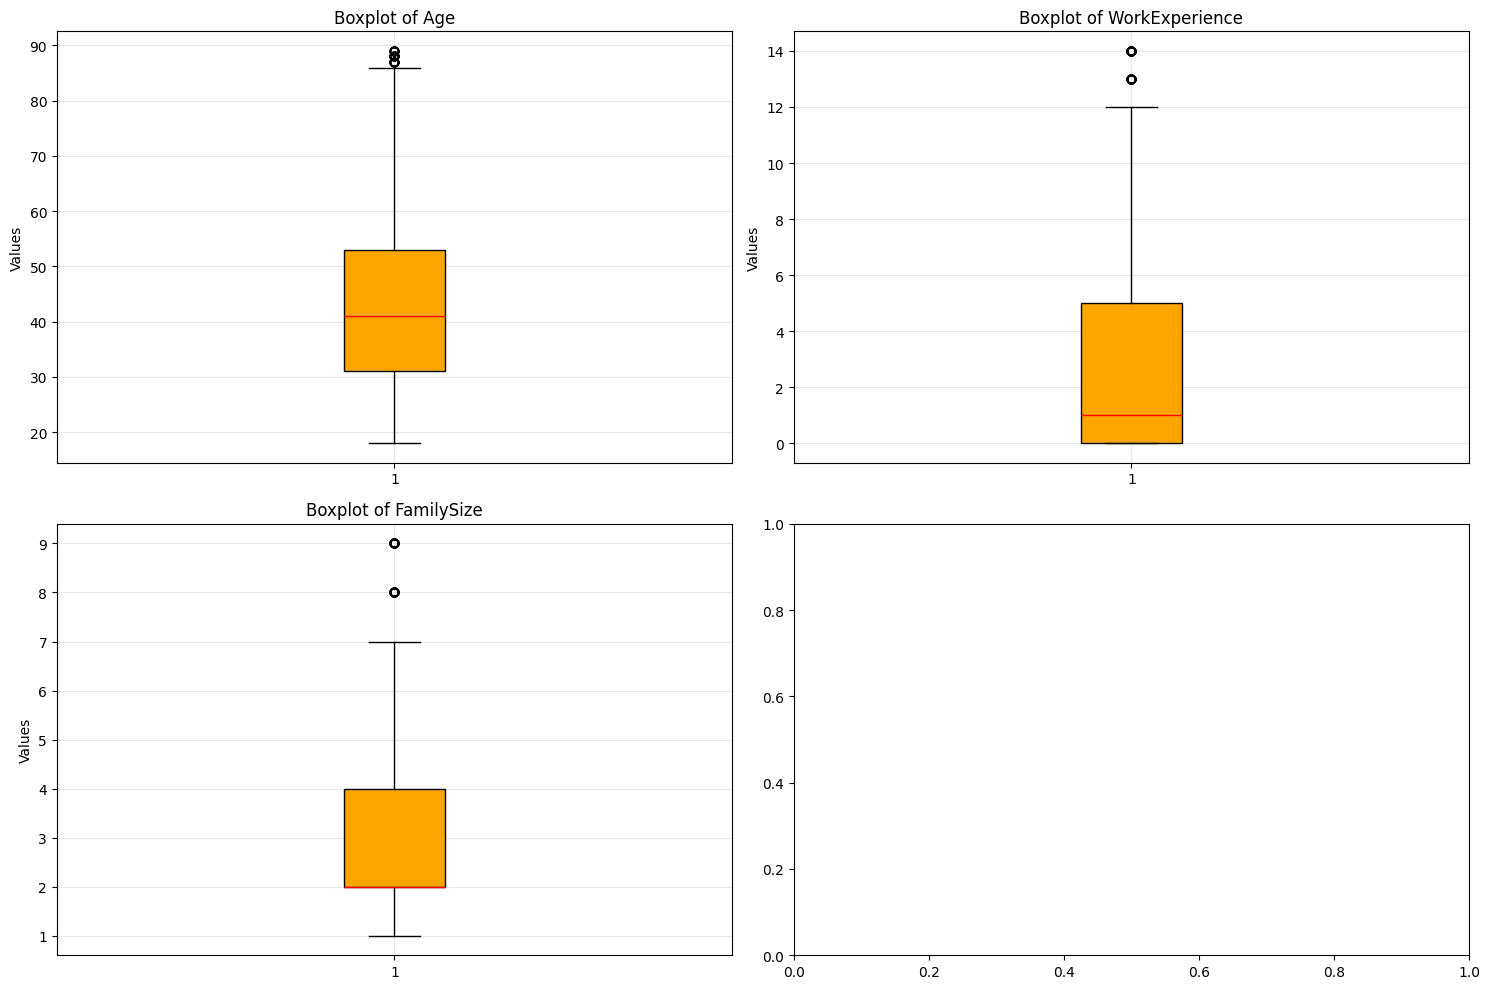

In [ ]:
plt.style.use('default')
fig, axe = plt.subplots(2, (len(numberical_cus_df) + 1) // 2, figsize=(15, 10))
box = axe.flatten() if len(numberical_cus_df) > 1 else axe
for i, col in enumerate(numberical_cus_df):
    if col in cus_df.columns:
        box[i].boxplot(cus_df[col], vert=True, patch_artist=True,
                        boxprops=dict(facecolor='orange', color='black'),
                        medianprops=dict(color='red'))
        box[i].set_title(f'Boxplot of {col}')
        box[i].set_ylabel('Values')
        box[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
cus_df

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize
0,Male,No,22,No,Healthcare,1.00,Low,4.00
1,Female,Yes,38,Yes,Engineer,1.00,Average,3.00
2,Female,Yes,67,Yes,Engineer,1.00,Low,1.00
3,Male,Yes,67,Yes,Lawyer,0.00,High,2.00
4,Female,Yes,40,Yes,Entertainment,1.00,High,6.00
...,...,...,...,...,...,...,...,...
10685,Female,No,27,No,Marketing,8.00,Low,4.00
10686,Female,Yes,42,Yes,Artist,0.00,Low,2.00
10689,Female,No,35,Yes,Entertainment,1.00,Low,2.00
10692,Female,No,53,Yes,Entertainment,1.00,Low,2.00


In [ ]:
for col in numberical_cus_df:
    if col in cus_df.columns:
        Q1 = cus_df[col].quantile(0.25)
        Q3 = cus_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        cus_df = cus_df[(cus_df[col] >= lower_bound) & (cus_df[col] <= upper_bound)]

In [ ]:
cus_df = cus_df.drop(cus_df[cus_df['Age'] > 80].index)

In [ ]:
cus_df

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize
0,Male,No,22,No,Healthcare,1.00,Low,4.00
1,Female,Yes,38,Yes,Engineer,1.00,Average,3.00
2,Female,Yes,67,Yes,Engineer,1.00,Low,1.00
3,Male,Yes,67,Yes,Lawyer,0.00,High,2.00
4,Female,Yes,40,Yes,Entertainment,1.00,High,6.00
...,...,...,...,...,...,...,...,...
10685,Female,No,27,No,Marketing,8.00,Low,4.00
10686,Female,Yes,42,Yes,Artist,0.00,Low,2.00
10689,Female,No,35,Yes,Entertainment,1.00,Low,2.00
10692,Female,No,53,Yes,Entertainment,1.00,Low,2.00


In [ ]:
cus_df.to_csv('Clean_Customer_Segmentation', index=False)

In [ ]:
cus_df = pd.read_csv('/content/Clean_Customer_Segmentation')

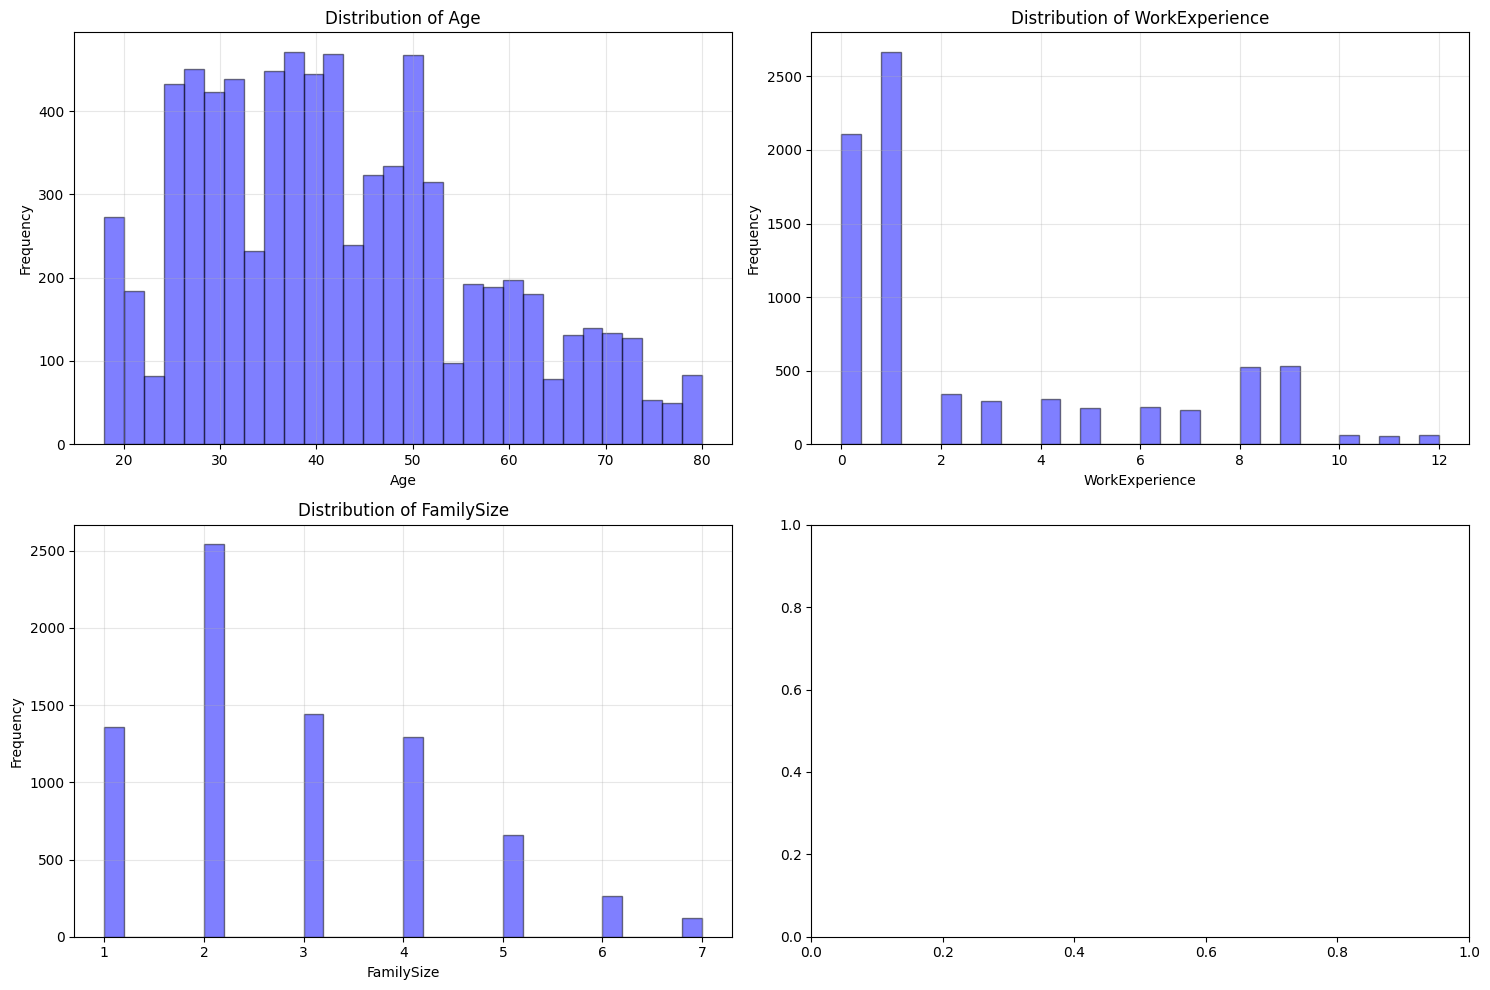

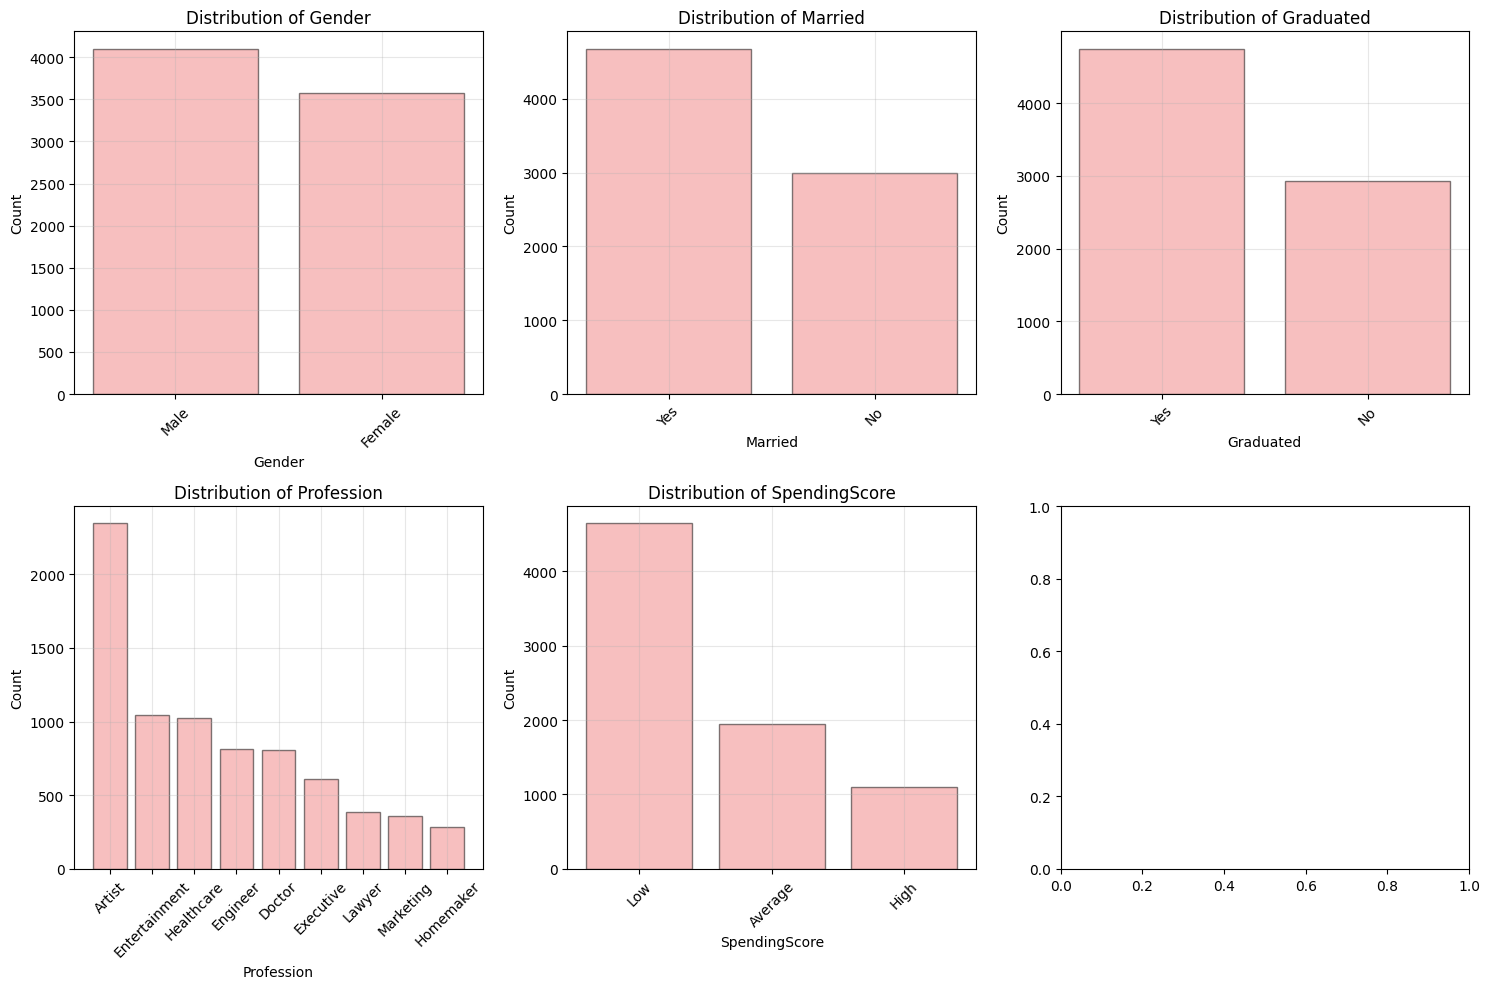

In [ ]:
plt.style.use('default')

if len(numberical_cus_df) > 0:
    n_num_cols = len(numberical_cus_df)
    fig, axes = plt.subplots(2, (n_num_cols + 1) // 2, figsize=(15, 10))
    axes = axes.flatten() if n_num_cols > 1 else [axes]

    for i, col in enumerate(numberical_cus_df):
        if col in cus_df.columns:
            axes[i].hist(cus_df[col], bins=30, alpha=0.5, color='blue', edgecolor='black')
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
            axes[i].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

if len(category_cus_df) > 0:
    n_cat_cols = len(category_cus_df)
    fig, axes = plt.subplots(2, (n_cat_cols + 1) // 2, figsize=(15, 10))
    axes = axes.flatten() if n_cat_cols > 1 else [axes]

    for i, col in enumerate(category_cus_df):
        if col in cus_df.columns:
            axes[i].bar(cus_df[col].value_counts().index, cus_df[col].value_counts() , alpha=0.5, color='lightcoral', edgecolor="black")
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Count')
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


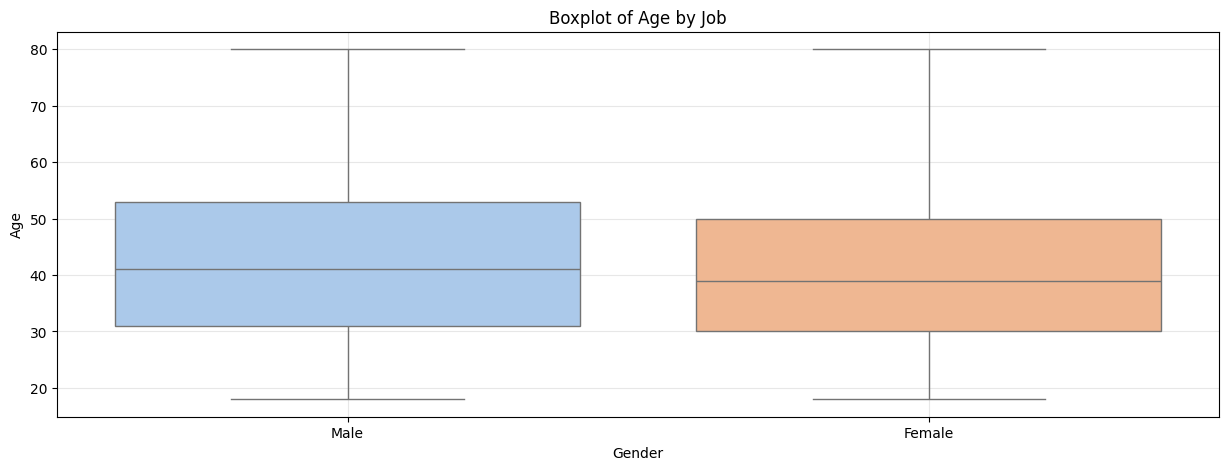

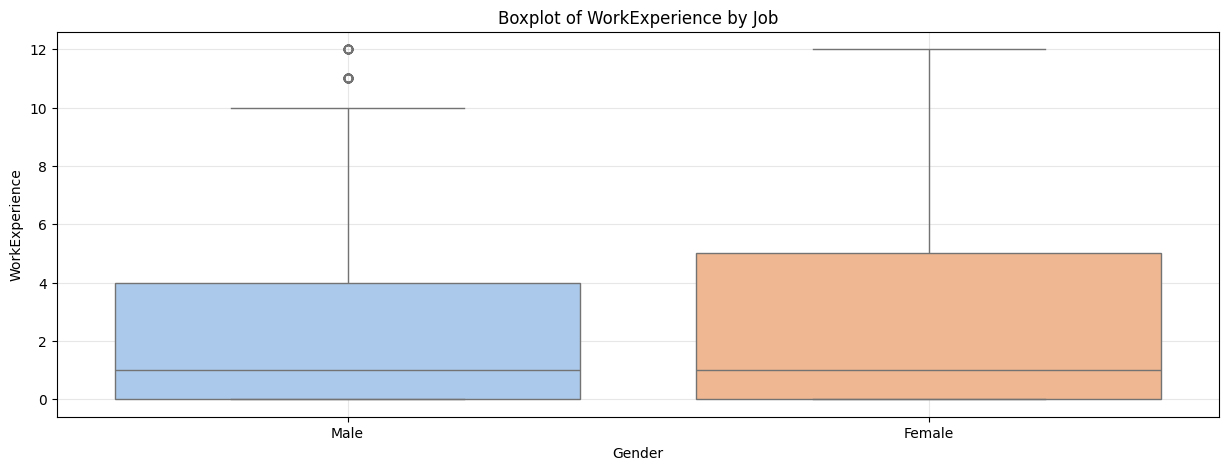

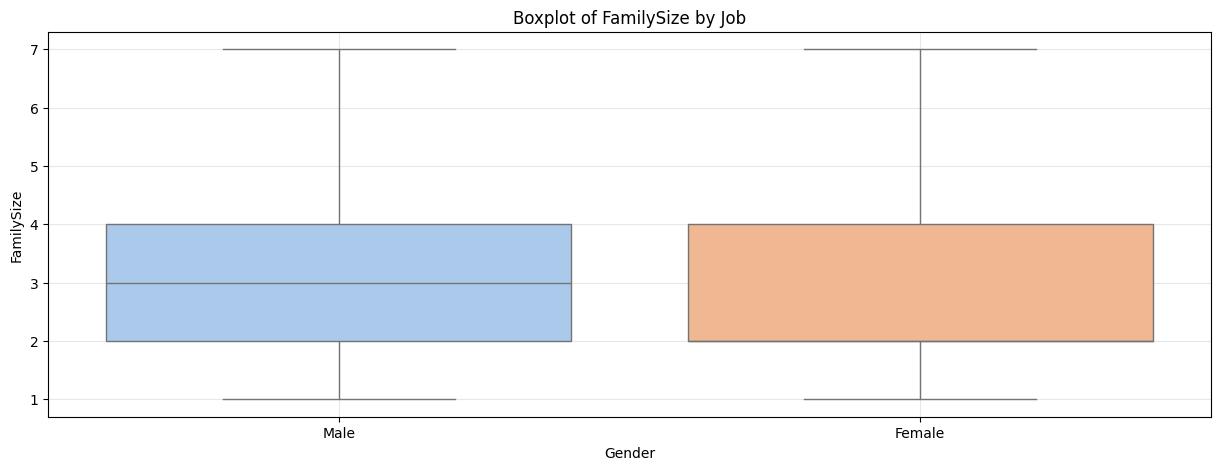

In [ ]:
for col in numberical_cus_df:
    plt.figure(figsize=(15,5))
    sns.boxplot(data=cus_df, x="Gender", y=col, palette='pastel')
    plt.title(f'Boxplot of {col} by Job')
    plt.grid(True, alpha=0.3)
    plt.show()

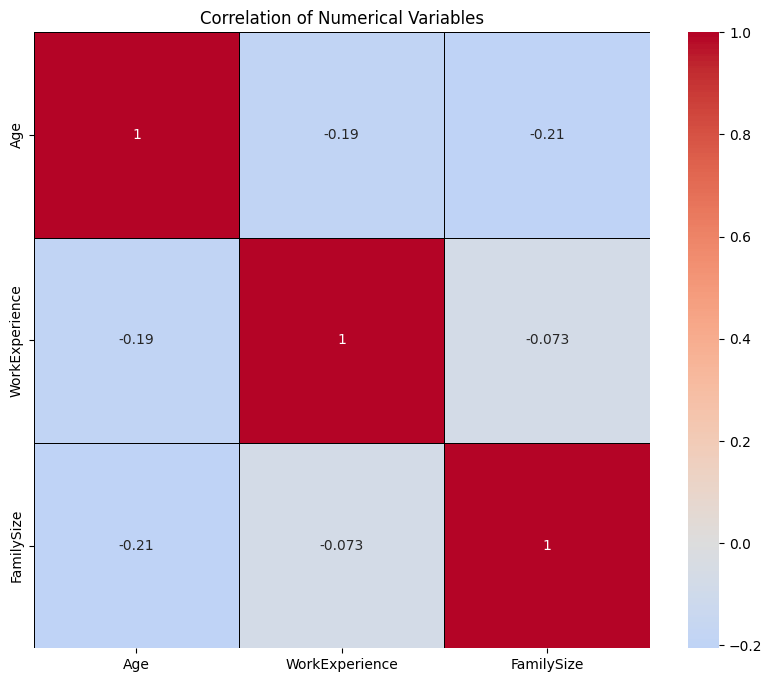

In [ ]:
correlation_matrix = cus_df.select_dtypes(include={"number"}).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0,
            square=True, linewidths=0.5, linecolor="black")
plt.title('Correlation of Numerical Variables')
plt.show()

In [ ]:
cus_df

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize
0,Male,No,22,No,Healthcare,1.00,Low,4.00
1,Female,Yes,38,Yes,Engineer,1.00,Average,3.00
2,Female,Yes,67,Yes,Engineer,1.00,Low,1.00
3,Male,Yes,67,Yes,Lawyer,0.00,High,2.00
4,Female,Yes,40,Yes,Entertainment,1.00,High,6.00
...,...,...,...,...,...,...,...,...
7671,Female,No,27,No,Marketing,8.00,Low,4.00
7672,Female,Yes,42,Yes,Artist,0.00,Low,2.00
7673,Female,No,35,Yes,Entertainment,1.00,Low,2.00
7674,Female,No,53,Yes,Entertainment,1.00,Low,2.00


In [ ]:
cus_df = cus_df.rename(columns={'Profession' : 'Job'})

In [ ]:
cus_df["Job"].value_counts()

,count
Job,
Artist,2345
Entertainment,1046
Healthcare,1026
Engineer,811
Doctor,806
Executive,611
Lawyer,385
Marketing,361
Homemaker,285


In [ ]:
cus_df["SpendingScore"].value_counts()

,count
SpendingScore,
Low,4640
Average,1940
High,1096


In [ ]:
cus_df["Married"].value_counts()

,count
Married,
Yes,4681
No,2995


#อายุเฉลี่ยของพนักงาน

In [ ]:
average_age = int(cus_df['Age'].mean())
print("Average Age:", average_age,"ปี")

Average Age: 42 ปี


In [ ]:
cus_df.duplicated().sum()

np.int64(0)

In [ ]:
cus_df.isnull().sum()

,0
Gender,0
Married,0
Age,0
Graduated,0
Job,0
WorkExperience,0
SpendingScore,0
FamilySize,0


In [ ]:
cus_df.head(10)

,Gender,Married,Age,Graduated,Job,WorkExperience,SpendingScore,FamilySize
0,Male,No,22,No,Healthcare,1.00,Low,4.00
1,Female,Yes,38,Yes,Engineer,1.00,Average,3.00
2,Female,Yes,67,Yes,Engineer,1.00,Low,1.00
3,Male,Yes,67,Yes,Lawyer,0.00,High,2.00
4,Female,Yes,40,Yes,Entertainment,1.00,High,6.00
5,Male,Yes,56,No,Artist,0.00,Average,2.00
6,Male,No,32,Yes,Healthcare,1.00,Low,3.00
7,Female,No,33,Yes,Healthcare,1.00,Low,3.00
8,Female,Yes,61,Yes,Engineer,0.00,Low,3.00
9,Female,Yes,55,Yes,Artist,1.00,Average,4.00


In [ ]:
cus_model = cus_df.copy()

In [ ]:
cus_model.duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
cus_model["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
cus_model['Gender'] = labelencoder.fit_transform(cus_model['Gender'])
cus_model["Gender"].unique()

array([1, 0])

In [ ]:
cus_model["Married"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
cus_model['Married'] = labelencoder.fit_transform(cus_model['Married'])
cus_model["Married"].unique()

array([0, 1])

In [ ]:
cus_model['Graduated'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
cus_model['Graduated'] = labelencoder.fit_transform(cus_model['Graduated'])
cus_model['Graduated'].unique()

array([0, 1])

In [ ]:
cus_model["Job"].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'], dtype=object)

In [ ]:
cus_model['Job'] = labelencoder.fit_transform(cus_model['Job'])
cus_model["Job"].unique()

array([5, 2, 7, 3, 0, 4, 1, 6, 8])

In [ ]:
cus_model["SpendingScore"].unique()

array(['Low', 'Average', 'High'], dtype=object)

In [ ]:
cus_model['SpendingScore'] = labelencoder.fit_transform(cus_model['SpendingScore'])
cus_model["SpendingScore"].unique()

array([2, 0, 1])

In [ ]:
cus_model.columns

Index(['Gender', 'Married', 'Age', 'Graduated', 'Job', 'WorkExperience',
       'SpendingScore', 'FamilySize'],
      dtype='object')

In [ ]:
cus_model

,Gender,Married,Age,Graduated,Job,WorkExperience,SpendingScore,FamilySize
0,1,0,22,0,5,1.00,2,4.00
1,0,1,38,1,2,1.00,0,3.00
2,0,1,67,1,2,1.00,2,1.00
3,1,1,67,1,7,0.00,1,2.00
4,0,1,40,1,3,1.00,1,6.00
...,...,...,...,...,...,...,...,...
7671,0,0,27,0,8,8.00,2,4.00
7672,0,1,42,1,0,0.00,2,2.00
7673,0,0,35,1,3,1.00,2,2.00
7674,0,0,53,1,3,1.00,2,2.00


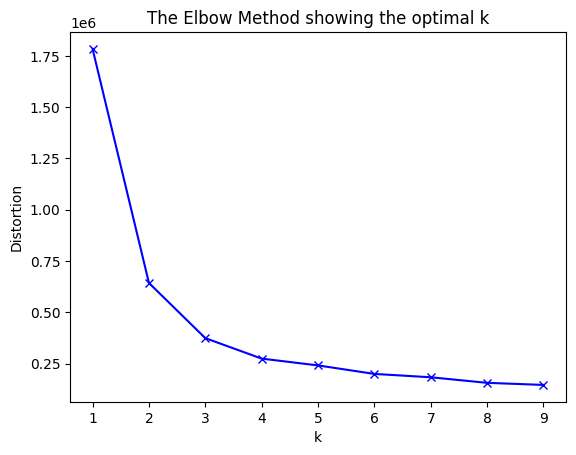

In [ ]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,10)
for k in K:
    clustering_model = KMeans(n_clusters=k)
    clustering_model.fit(cus_model)
    distortions.append(clustering_model.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Silhouette Coefficient for k == 2: 0.5233
Silhouette Coefficient for k == 3: 0.4421
Silhouette Coefficient for k == 4: 0.3904
Silhouette Coefficient for k == 5: 0.3616
Silhouette Coefficient for k == 6: 0.3474
Silhouette Coefficient for k == 7: 0.323
Silhouette Coefficient for k == 8: 0.3461
Silhouette Coefficient for k == 9: 0.3444


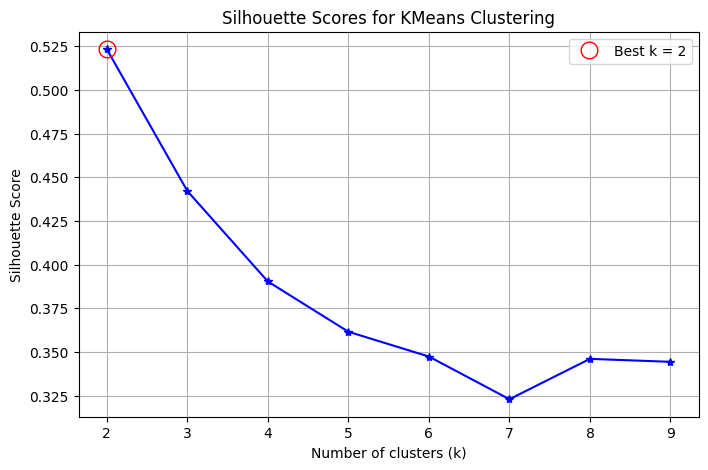

2

In [ ]:
from sklearn.metrics import silhouette_score
def silhouette(data, max_k):
    k_range = range(2, max_k)
    scores = []

    for k in k_range:
        model = KMeans(n_clusters=k, init='k-means++', random_state=42)
        labels = model.fit_predict(data)
        score = silhouette_score(data, labels)
        scores.append(score)
        print(f"Silhouette Coefficient for k == {k}: {round(score, 4)}")

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, scores, 'b*-')
    best_k = k_range[np.argmax(scores)]
    best_score = max(scores)
    plt.plot(best_k, best_score, 'ro', markersize=12, markerfacecolor='None', label=f'Best k = {best_k}')
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Scores for KMeans Clustering")
    plt.legend()
    plt.grid(True)
    plt.show()

    return best_k

silhouette(cus_model, 10)

In [ ]:
from sklearn.cluster import KMeans
clustering_model = KMeans(n_clusters=3)
clustering_model

KMeans(n_clusters=3)

In [ ]:
output_cluster = clustering_model.fit_predict(cus_model)

In [ ]:
cus_model['Kmeans_cluster'] = output_cluster
cus_model

,Gender,Married,Age,Graduated,Job,WorkExperience,SpendingScore,FamilySize,Kmeans_cluster
0,1,0,22,0,5,1.00,2,4.00,1
1,0,1,38,1,2,1.00,0,3.00,2
2,0,1,67,1,2,1.00,2,1.00,0
3,1,1,67,1,7,0.00,1,2.00,0
4,0,1,40,1,3,1.00,1,6.00,2
...,...,...,...,...,...,...,...,...,...
7671,0,0,27,0,8,8.00,2,4.00,1
7672,0,1,42,1,0,0.00,2,2.00,2
7673,0,0,35,1,3,1.00,2,2.00,1
7674,0,0,53,1,3,1.00,2,2.00,2


In [ ]:
cluster1 = cus_model[cus_model['Kmeans_cluster']== 0]
cluster1.describe()

,Gender,Married,Age,Graduated,Job,WorkExperience,SpendingScore,FamilySize,Kmeans_cluster
count,"1,648.00","1,648.00","1,648.00","1,648.00","1,648.00","1,648.00","1,648.00","1,648.00","1,648.00"
mean,0.61,0.93,64.65,0.69,2.99,1.54,1.09,2.44,0.00
std,0.49,0.26,6.86,0.46,2.81,2.33,0.84,1.23,0.00
min,0.00,0.00,55.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,0.00,1.00,59.00,0.00,0.00,0.00,0.00,2.00,0.00
50%,1.00,1.00,63.00,1.00,3.00,1.00,1.00,2.00,0.00
75%,1.00,1.00,70.00,1.00,6.00,1.00,2.00,3.00,0.00
max,1.00,1.00,80.00,1.00,8.00,12.00,2.00,7.00,0.00


In [ ]:
job = cluster1["Job"].value_counts()
job

,count
Job,
0,566
7,358
3,217
4,201
2,120
1,92
8,44
6,31
5,19


In [ ]:
age = cluster1["Age"].value_counts()
age

,count
Age,
61,104
59,103
56,102
55,97
62,96
60,93
57,90
58,86
63,84


In [ ]:
cluster2 = cus_model[cus_model['Kmeans_cluster']== 1]
cluster2.describe()

,Gender,Married,Age,Graduated,Job,WorkExperience,SpendingScore,FamilySize,Kmeans_cluster
count,"2,963.00","2,963.00","2,963.00","2,963.00","2,963.00","2,963.00","2,963.00","2,963.00","2,963.00"
mean,0.51,0.31,28.45,0.47,3.18,3.18,1.70,3.13,1.00
std,0.50,0.46,4.93,0.50,2.38,3.48,0.67,1.52,0.00
min,0.00,0.00,18.00,0.00,0.00,0.00,0.00,1.00,1.00
25%,0.00,0.00,25.00,0.00,1.00,0.00,2.00,2.00,1.00
50%,1.00,0.00,29.00,0.00,3.00,1.00,2.00,3.00,1.00
75%,1.00,1.00,32.00,1.00,5.00,6.00,2.00,4.00,1.00
max,1.00,1.00,36.00,1.00,8.00,12.00,2.00,7.00,1.00


In [ ]:
job = cluster2["Job"].value_counts()
job

,count
Job,
5,883
0,552
1,421
3,353
2,287
8,196
6,149
4,117
7,5


In [ ]:
age = cluster2["Age"].value_counts()
age

,count
Age,
35,235
33,232
28,230
32,226
25,223
30,220
27,220
31,213
36,212


In [ ]:
cluster3 = cus_model[cus_model['Kmeans_cluster']== 2]
cluster3.describe()

,Gender,Married,Age,Graduated,Job,WorkExperience,SpendingScore,FamilySize,Kmeans_cluster
count,"3,065.00","3,065.00","3,065.00","3,065.00","3,065.00","3,065.00","3,065.00","3,065.00","3,065.00"
mean,0.52,0.73,44.23,0.73,1.98,2.86,1.15,2.72,2.00
std,0.50,0.44,5.03,0.45,2.18,3.26,0.91,1.40,0.00
min,0.00,0.00,36.00,0.00,0.00,0.00,0.00,1.00,2.00
25%,0.00,0.00,40.00,0.00,0.00,0.00,0.00,2.00,2.00
50%,1.00,1.00,43.00,1.00,2.00,1.00,2.00,2.00,2.00
75%,1.00,1.00,49.00,1.00,3.00,5.00,2.00,4.00,2.00
max,1.00,1.00,55.00,1.00,8.00,12.00,2.00,7.00,2.00


In [ ]:
job = cluster3["Job"].value_counts()
job

,count
Job,
0,1227
3,476
2,404
4,293
1,293
5,124
8,121
6,105
7,22


In [ ]:
age = cluster3["Age"].value_counts()
age

,count
Age,
42,244
37,239
43,239
38,232
40,225
41,225
39,220
48,170
51,166


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(cus_model)
PCA_ds = pd.DataFrame(pca.transform(cus_model), columns=(["col1","col2","col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,"7,676.00",-0.00,14.60,-24.93,-11.54,-2.41,9.47,37.58
col2,"7,676.00",-0.00,3.18,-4.11,-2.28,-1.36,1.92,10.51
col3,"7,676.00",-0.00,2.48,-3.04,-2.49,-0.50,2.13,5.82


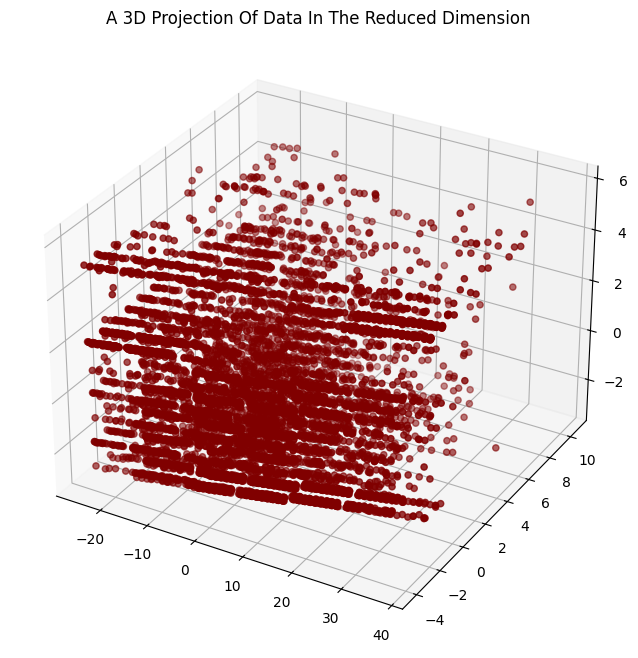

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [ ]:
sse = clustering_model.inertia_
sse

374094.3044841044

In [ ]:
cus_df.head(5)

,Gender,Married,Age,Graduated,Job,WorkExperience,SpendingScore,FamilySize
0,Male,No,22,No,Healthcare,1.00,Low,4.00
1,Female,Yes,38,Yes,Engineer,1.00,Average,3.00
2,Female,Yes,67,Yes,Engineer,1.00,Low,1.00
3,Male,Yes,67,Yes,Lawyer,0.00,High,2.00
4,Female,Yes,40,Yes,Entertainment,1.00,High,6.00


In [ ]:
cus_model.head(5)

,Gender,Married,Age,Graduated,Job,WorkExperience,SpendingScore,FamilySize,Kmeans_cluster
0,1,0,22,0,5,1.00,2,4.00,1
1,0,1,38,1,2,1.00,0,3.00,2
2,0,1,67,1,2,1.00,2,1.00,0
3,1,1,67,1,7,0.00,1,2.00,0
4,0,1,40,1,3,1.00,1,6.00,2


In [ ]:
cus_df = pd.concat([cus_df, cus_model['Kmeans_cluster']],axis=1)

In [ ]:
cus_df.head(5)

,Gender,Married,Age,Graduated,Job,WorkExperience,SpendingScore,FamilySize,Kmeans_cluster
0,Male,No,22,No,Healthcare,1.00,Low,4.00,1
1,Female,Yes,38,Yes,Engineer,1.00,Average,3.00,2
2,Female,Yes,67,Yes,Engineer,1.00,Low,1.00,0
3,Male,Yes,67,Yes,Lawyer,0.00,High,2.00,0
4,Female,Yes,40,Yes,Entertainment,1.00,High,6.00,2


In [ ]:
#import pickle
#filename = '/content/kmeans_model.pkl'
#with open(filename, 'wb') as file:
#    pickle.dump(clustering_model, file)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=3)
output_agg_cluster = agg_cluster.fit_predict(cus_model)

In [ ]:
cus_model['agg_cluster'] = output_agg_cluster
cus_model

,Gender,Married,Age,Graduated,Job,WorkExperience,SpendingScore,FamilySize,Kmeans_cluster,agg_cluster
0,1,0,22,0,5,1.00,2,4.00,1,0
1,0,1,38,1,2,1.00,0,3.00,2,0
2,0,1,67,1,2,1.00,2,1.00,0,2
3,1,1,67,1,7,0.00,1,2.00,0,2
4,0,1,40,1,3,1.00,1,6.00,2,0
...,...,...,...,...,...,...,...,...,...,...
7671,0,0,27,0,8,8.00,2,4.00,1,0
7672,0,1,42,1,0,0.00,2,2.00,2,0
7673,0,0,35,1,3,1.00,2,2.00,1,0
7674,0,0,53,1,3,1.00,2,2.00,2,1


In [ ]:
cus_model

,Gender,Married,Age,Graduated,Job,WorkExperience,SpendingScore,FamilySize,Kmeans_cluster,agg_cluster
0,1,0,22,0,5,1.00,2,4.00,1,0
1,0,1,38,1,2,1.00,0,3.00,2,0
2,0,1,67,1,2,1.00,2,1.00,0,2
3,1,1,67,1,7,0.00,1,2.00,0,2
4,0,1,40,1,3,1.00,1,6.00,2,0
...,...,...,...,...,...,...,...,...,...,...
7671,0,0,27,0,8,8.00,2,4.00,1,0
7672,0,1,42,1,0,0.00,2,2.00,2,0
7673,0,0,35,1,3,1.00,2,2.00,1,0
7674,0,0,53,1,3,1.00,2,2.00,2,1


In [ ]:
from sklearn.cluster import DBSCAN
db_cluster = DBSCAN(eps=1.0, min_samples=5)
output_db_cluster = db_cluster.fit_predict(cus_model)

In [ ]:
cus_model['db_cluster'] = output_db_cluster
cus_model

,Gender,Married,Age,Graduated,Job,WorkExperience,SpendingScore,FamilySize,Kmeans_cluster,agg_cluster,db_cluster
0,1,0,22,0,5,1.00,2,4.00,1,0,0
1,0,1,38,1,2,1.00,0,3.00,2,0,7
2,0,1,67,1,2,1.00,2,1.00,0,2,-1
3,1,1,67,1,7,0.00,1,2.00,0,2,1
4,0,1,40,1,3,1.00,1,6.00,2,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
7671,0,0,27,0,8,8.00,2,4.00,1,0,-1
7672,0,1,42,1,0,0.00,2,2.00,2,0,7
7673,0,0,35,1,3,1.00,2,2.00,1,0,47
7674,0,0,53,1,3,1.00,2,2.00,2,1,117


In [ ]:
from sklearn.metrics import silhouette_score

def evaluate_clusters(X, labels, name):
    if len(set(labels)) > 1 and -1 not in labels:
        score = silhouette_score(X, labels)
        print(f'{name} Silhouette Score: {score:.3f}')
    else:
        print(f'{name} Silhouette Score: Not Applicable')

evaluate_clusters(cus_model, cus_model['Kmeans_cluster'], 'KMeans')
evaluate_clusters(cus_model, cus_model['agg_cluster'], 'Agglomerative')
evaluate_clusters(cus_model, cus_model['db_cluster'], 'DBSCAN')


KMeans Silhouette Score: 0.290
Agglomerative Silhouette Score: 0.303
DBSCAN Silhouette Score: -0.113


In [ ]:
agg_cluster1 = cus_model[cus_model['agg_cluster'] == 0]
agg_cluster1.describe()

,Gender,Married,Age,Graduated,Job,WorkExperience,SpendingScore,FamilySize,Kmeans_cluster,agg_cluster,db_cluster
count,"4,590.00","4,590.00","4,590.00","4,590.00","4,590.00","4,590.00","4,590.00","4,590.00","4,590.00","4,590.00","4,590.00"
mean,0.51,0.43,32.55,0.56,2.79,3.23,1.54,2.94,1.35,0.00,6.49
std,0.50,0.49,6.91,0.50,2.37,3.48,0.79,1.49,0.48,0.00,19.28
min,0.00,0.00,18.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,-1.00
25%,0.00,0.00,27.00,0.00,0.00,1.00,1.00,2.00,1.00,0.00,-1.00
50%,1.00,0.00,33.00,1.00,3.00,1.00,2.00,3.00,1.00,0.00,-1.00
75%,1.00,1.00,39.00,1.00,5.00,6.00,2.00,4.00,2.00,0.00,7.00
max,1.00,1.00,45.00,1.00,8.00,12.00,2.00,7.00,2.00,0.00,118.00


In [ ]:
agg_cluster2 = cus_model[cus_model['agg_cluster'] == 1]
agg_cluster2.describe()

,Gender,Married,Age,Graduated,Job,WorkExperience,SpendingScore,FamilySize,Kmeans_cluster,agg_cluster,db_cluster
count,"2,308.00","2,308.00","2,308.00","2,308.00","2,308.00","2,308.00","2,308.00","2,308.00","2,308.00","2,308.00","2,308.00"
mean,0.56,0.86,52.79,0.74,1.94,2.18,1.01,2.80,1.25,1.00,4.12
std,0.50,0.35,5.55,0.44,2.23,2.83,0.90,1.39,0.97,0.00,13.76
min,0.00,0.00,45.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,-1.00
25%,0.00,1.00,48.00,0.00,0.00,0.00,0.00,2.00,0.00,1.00,-1.00
50%,1.00,1.00,52.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,-1.00
75%,1.00,1.00,58.00,1.00,3.00,3.00,2.00,4.00,2.00,1.00,5.00
max,1.00,1.00,67.00,1.00,8.00,12.00,2.00,7.00,2.00,1.00,117.00


In [ ]:
agg_cluster3 = cus_model[cus_model['agg_cluster'] == 2]
agg_cluster3.describe()

,Gender,Married,Age,Graduated,Job,WorkExperience,SpendingScore,FamilySize,Kmeans_cluster,agg_cluster,db_cluster
count,778.00,778.00,778.00,778.00,778.00,778.00,778.00,778.00,778.00,778.00,778.00
mean,0.60,0.94,70.88,0.63,4.06,1.16,1.24,2.16,0.00,2.00,10.01
std,0.49,0.24,4.22,0.48,2.93,1.86,0.75,1.04,0.00,0.00,23.54
min,0.00,0.00,63.00,0.00,0.00,0.00,0.00,1.00,0.00,2.00,-1.00
25%,0.00,1.00,68.00,0.00,1.00,0.00,1.00,2.00,0.00,2.00,-1.00
50%,1.00,1.00,70.00,1.00,4.00,1.00,1.00,2.00,0.00,2.00,-1.00
75%,1.00,1.00,73.00,1.00,7.00,1.00,2.00,2.00,0.00,2.00,1.00
max,1.00,1.00,80.00,1.00,8.00,12.00,2.00,7.00,0.00,2.00,107.00


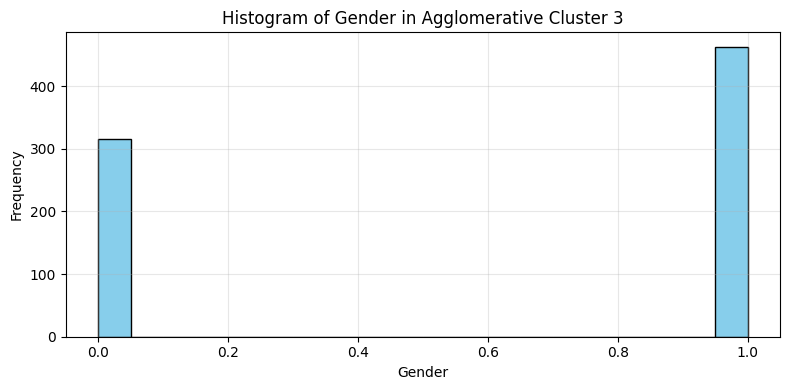

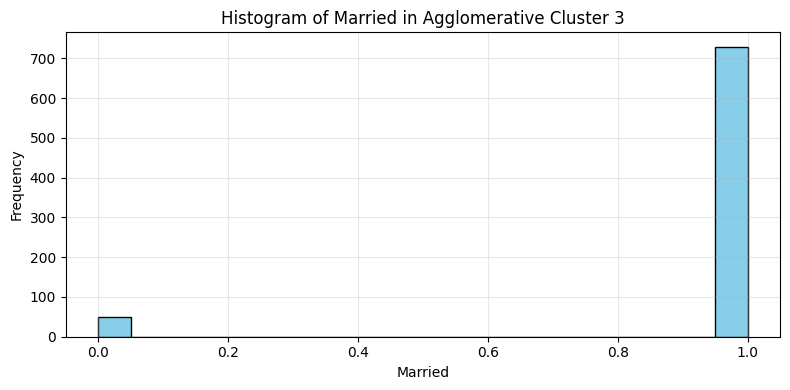

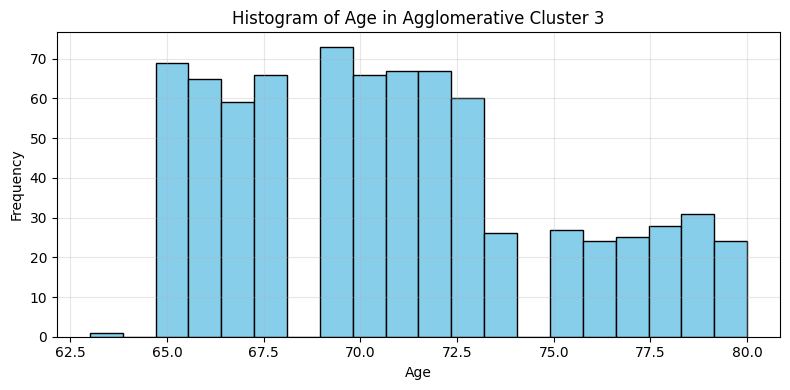

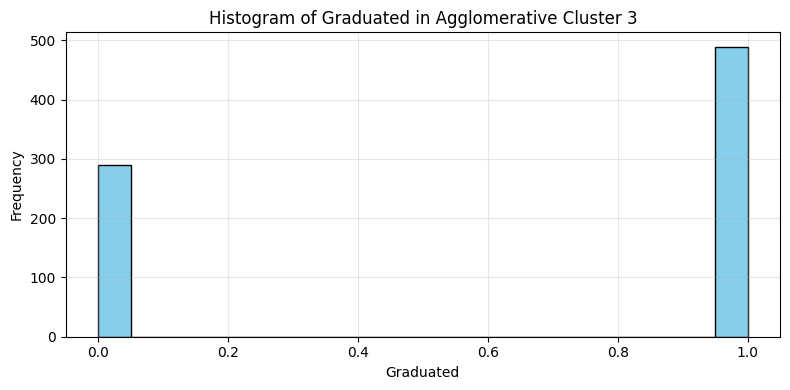

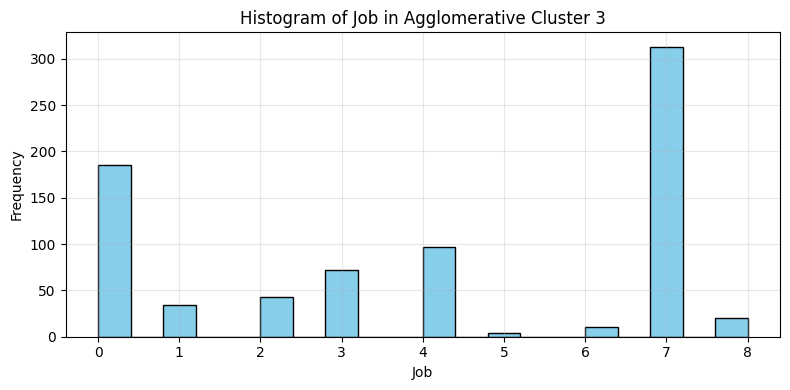

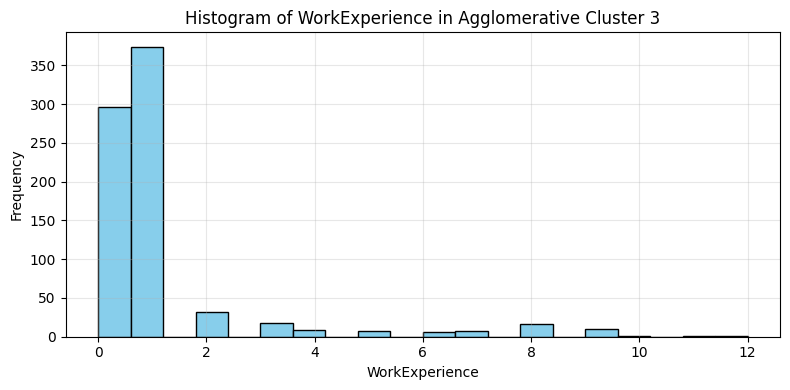

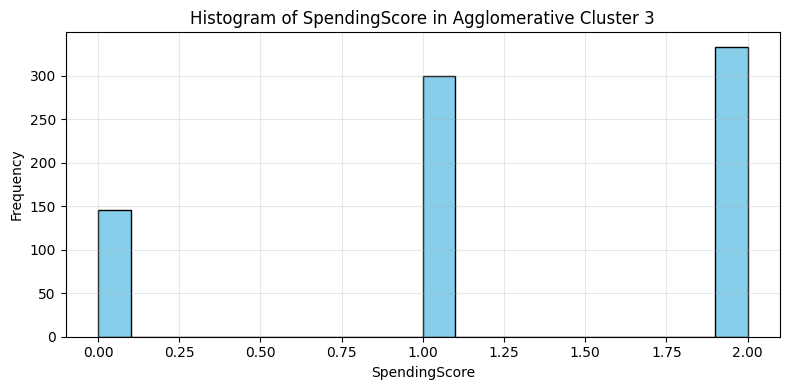

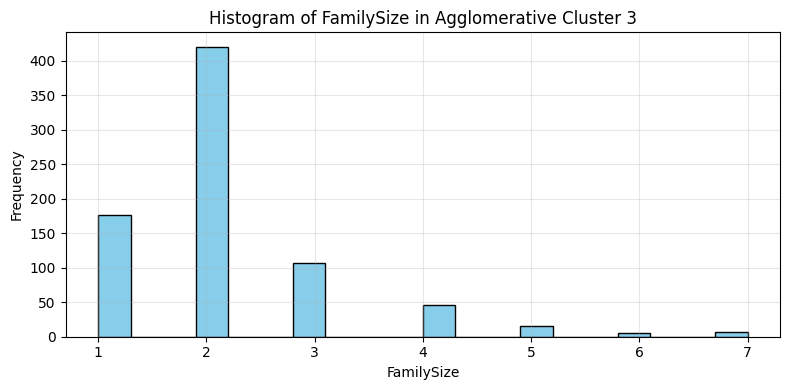

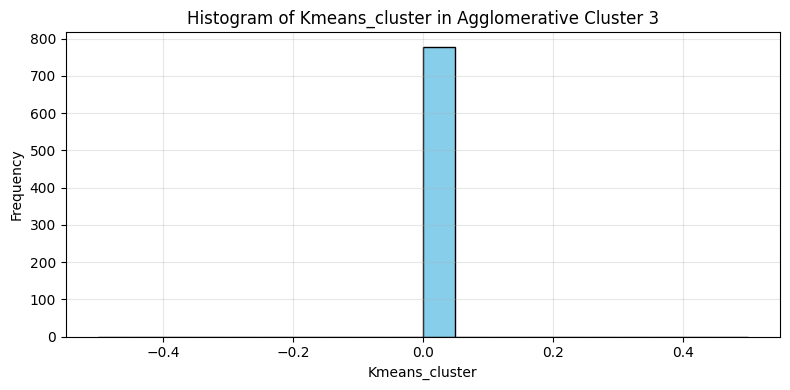

In [ ]:
for col in cus_df.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(agg_cluster3[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col} in Agglomerative Cluster 3')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
